# Exploratoty Analysis on the csv Titanic from Kaggle.

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importando dados da máquina local.

[Mais info](https://https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [4]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Quantidade de informações nulas:

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Heatmap pra analisar a quantidade de dados nulos:
Em Age e Cabin tem dados nulos. Muito mais em Cabin.

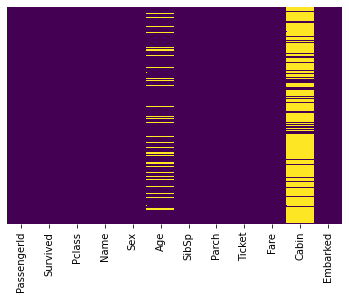

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [8]:
sns.set_style("whitegrid")

## Comparando qantidade de sobreviventes vs mortos:

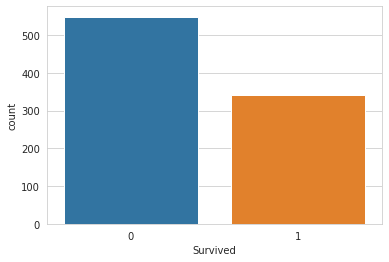

In [9]:
sns.countplot(x="Survived", data= train)

## Sobreviventes vcs mortos por sexo:

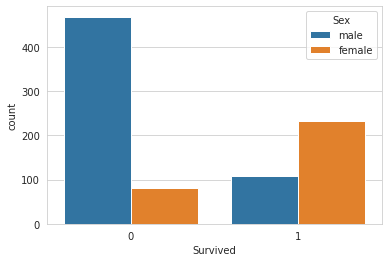

In [10]:
sns.countplot(x="Survived", hue="Sex",data= train)

## Sobreviventes vs mortos de acordo com a classe:

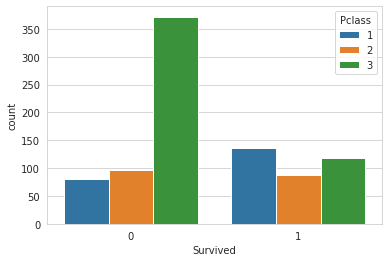

In [11]:
sns.countplot(x="Survived", hue="Pclass",data= train)

## Analizando a faixa etária de todos os passageiros:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


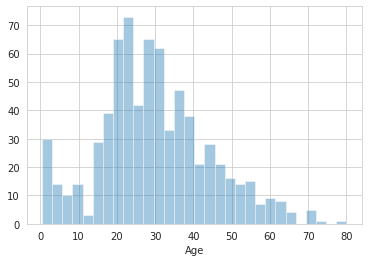

In [12]:
sns.distplot(train["Age"].dropna(), kde=False, bins=30)

Fazendo o mesmo sem o seaborne:

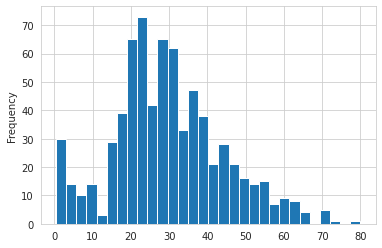

In [13]:
train["Age"].plot.hist(bins=30)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analizando quantas pessoas estavam acompanhadas por irmãos ou cônjuge:

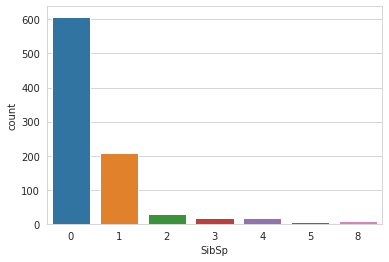

In [15]:
sns.countplot(x="SibSp", data=train)

## Analizando a distribuição dos preços das passagens:

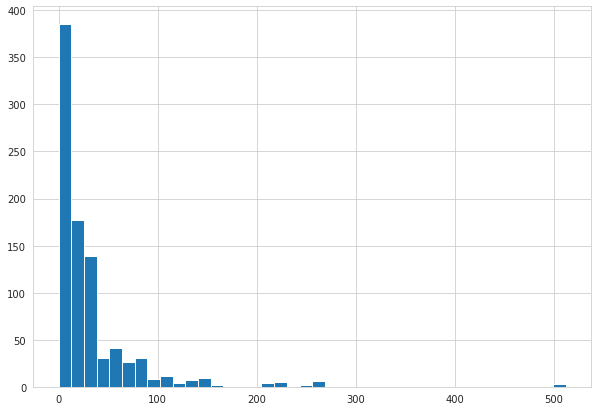

In [16]:
train["Fare"].hist(bins=40, figsize=(10,7))



---


# Second part.
## Cleaning the data


---



Quando tem muitos dados faltantes, pode-se preencher com a média. Isso se chama IMPUTATION.

No caso da coluna Age, tem uns dados nulos e vamos preencher com a idade média de acordo como a classe.

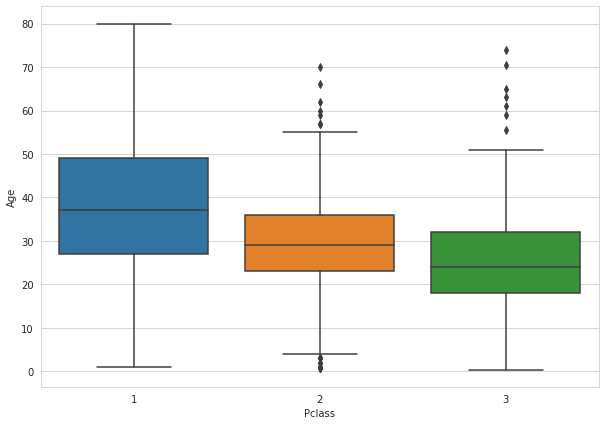

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data = train)

Craindo uma função que faça a substituição dos nulos, pela média da idade de acordo com a classe do passageiro.

In [18]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [19]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis= 1)

*eu não entendi esse axis=1
ACHEI: 'axis : {0 or 'index', 1 or 'columns'}'

##Conferindo o heatmap:

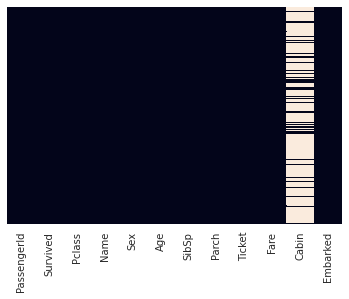

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

A coluna Age está toda completa.

Mas a coluna Cabin tem muitos nulos e não é muito relevante para essa análise. Então, vamos deletar ela.

In [21]:
train.drop("Cabin", axis=1, inplace=True)

INPLACE: bool, default False <br>
If False, return a copy. Otherwise, do operation inplace and return None.

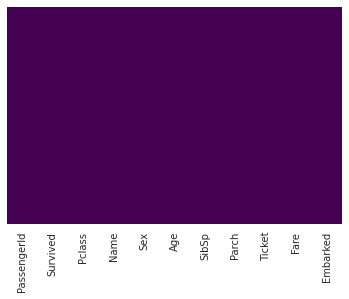

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Na tabela do professor aparece umas linhas de nulo na coluna Embarked. Mas na minha não aparece.
Ele resolve isso deletando as linhas com o código:
 
```
train.dropna(inplace= True)
```



## Dummy variable:
### Agora vamos converter alguns dados de texto em 0 ou 1. Otherwise the machine learning cannot take these features directly as input.

For that, use the function pd.get_dummies() -> it converts categorical variable into values known as dummies or as indicator variables.

In [23]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Não necessidade das duas colunas, porque se o machine learning tem 'male' = 0, já vai saber que é 'female' (eu acho que é isso que o fessô disse). Para evitar essa 'multiple linearity' exclui uma das colunas e deixa outra.

In [24]:
pd.get_dummies(train["Sex"], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Coloca isso dentro de uma variável: SEX.

In [25]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

O mesmo se faz com a coluna Embarked.

In [26]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

E concartena essas duas colunas na tabela.

In [27]:
train = pd.concat([train, sex, embark], axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Agora, deletemas todas as outras colunas que não precisamos:

In [29]:
train.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [30]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


A coluna de Pclass tb pode ser colocada comom dummies. 
Parece que pode haver uma diferença na hora de treinar o ML. Vou esperar pra ver.